# Agenda[Feature Extraction and Description] 


1. Feature detection algorithms (e.g., Harris, SIFT, SURF)
2. Feature description and matching techniques
3. Feature-based image alignment

# Feature Extraction

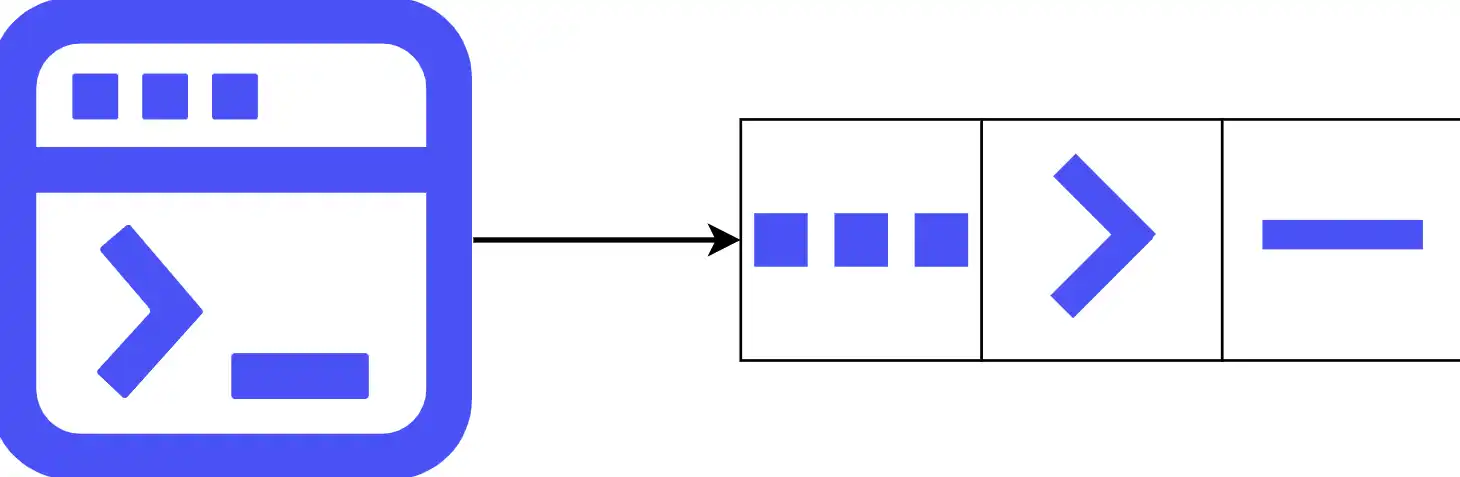

## Keypoint Detection 

Have you ever wondered how the human brain is capable of recognizing many different objects so quickly? We can recognize patterns and shapes in a split of a second. For example, humans have a natural ability to recognize faces. New research shows that the baby’s brain recognizes faces from the earliest days. So, how can we do that? Well, the answer is simple. Because our brain is triggered by the most interesting points of an image. These interesting, distinct features we also call keypoints. In many computer vision and machine learning applications, we need these feature points that will assist us to compare and detect objects or scenes.

<img src="https://media5.datahacker.rs/2020/09/Picture1-1536x416.jpg" alt="drawing" style="width:500px;"/>

## Where can we find keypoints in the image?

The next question that we need to answer is where we can locate these points in the image? Well, we can find them in regions where we can detect rapid pixel intensity change. These areas are edges and corners. The edge represents an interesting set of points that can help us to better characterize the object in the image. Corners are even more distinct because they are located at the intersection of two or more lines

<img src="https://media5.datahacker.rs/2020/09/23.jpg" alt="drawing" style="width:500px;"/>

If we have look at the above image we can differentiate two distinctive sets of points. The points located inside these geometric shapes are not that interesting because their small pixel neighborhood is completely identical. On the other hand, the edges of these objects are much more interesting because their local neighborhood is different. For example, if we look at the triangle in the following image we can see the pixels that create an edge are surrounded with pixels with different intensities. That means that the intensity of a pixel inside the triangle is different from the intensity of a pixel outside of a triangle.

---

## Feature detection algorithms
- Harris Corner Detector
- Scale Invariant Feature Transform (SIFT)
- ORB (Oriented FAST and Rotated BRIEF)

## Harris Corner Detector

Now when we know that the most interesting parts of an image are corners, it is important to learn how to detect them. Among many algorithms, Harris Corner Detector is one of the most popular methods for feature detection due to its good results and robustness.

<img src="https://media5.datahacker.rs/2020/09/index2-768x566.png" alt="drawing" style="width:500px;"/>

In [1]:
#import needed libraries 
import cv2 as cv 
import numpy as np 

In [2]:
img = cv.imread('images/chessboard.jpg')

In [3]:
cv.imshow("Chessboard", img)
cv.waitKey(0)
cv.destroyAllWindows()

### Harris Corner Detector [cornerHarris()](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345) 

This function consist of the following parameters:
- `src`: Input image that should be `grayscale` and `float32` type.
- `blockSize`: It is the size of the neighborhood considered for corner detection.
- `ksize`:Aperture parameter of Sobel derivative used.
- `k`:Harris detector free parameter in the equation.

#### Convert image to Grayscale and float32

In [4]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

In [5]:
gray

array([[ 11.,  11.,  11., ..., 255., 255., 255.],
       [ 11.,  11.,  11., ..., 255., 255., 255.],
       [ 11.,  11.,  11., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ...,  11.,  11.,  11.],
       [255., 255., 255., ...,  11.,  11.,  11.],
       [255., 255., 255., ...,  11.,  11.,  11.]], dtype=float32)

In [6]:
dst = cv.cornerHarris(gray, 2, 3, 0.04)

In [7]:
cv.imshow("dst", dst)
cv.waitKey(0)
cv.destroyAllWindows()

Then, we will apply the process of dilation with the function [`cv2.dilate()`](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c). We use this function to increase the object area and to emphasize features. Finally, we need to apply a threshold for an optimal value that can vary depending on an image.

In [8]:
# # Applying dilation to increase the object area and to emphasize features
dst = cv.dilate(dst, None)
cv.imshow("dst", dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
# Threshold for an optimal value. It may vary depending on the image.
img1 = img.copy()
img1[dst>0.2*dst.max()]=[0, 0, 255]

In [10]:
cv.imshow("Chessboard corners", img1)
cv.waitKey(0)
cv.destroyAllWindows()

We can see that when we decrease a threshold value the number of detected points will increase. So, when a value for a threshold was set to `0.02 * dis.max` we detected just a few points that are the most dominant. That means that keypoints in the other three images are not as distinct as the points on the first image.

## [Scale Invariant Feature Transform (SIFT)](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)

One of the most popular algorithms in image processing is Scale Invariant Feature Transform or SIFT. This algorithm is perfectly suitable for our goal because it detects features that are invariant to image scale and rotation. Moreover, features are local and based on the appearance of the object in certain interesting points. They are also robust to changes in illumination, noise, and minor changes in viewpoint.

SIFT was first presented in 2004, by David G. Lowe from the University of British Columbia in the paper, Distinctive Image Features from Scale-Invariant Keypoints, This algorithm is patented, and it is included in the Non-free module in OpenCV. That is why we need to install the older version of OpenCV because SIFT is not included in the new OpenCV library. We can do that with the following code.

---
### Here's how SIFT works:

1. Initialize the SIFT detector by using [cv2.SIFT_create()](https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/page_tutorial_py_sift_intro.html):
  
<hr>
  
![](https://www.researchgate.net/publication/241639414/figure/fig1/AS:670705813295106@1536920135145/Gaussian-pyramid-and-difference-of-Gaussian-DoG-pyramid-There-are-three-octaves-each.jpg)

In [11]:
sift_Detector = cv.SIFT_create()

2. Detect the keypoints and compute descriptors [cv.Sift/DetectandCompute](https://amroamroamro.github.io/mexopencv/matlab/cv.SIFT.detectAndCompute.html):

In [12]:
sift_keypoints, descriptors = sift_Detector.detectAndCompute(gray.astype(np.uint8), None)

## What are descriptors?

Along with the features we use the term descriptor It can be seen as the way to compare the keypoints by summarizing some characteristics about them. Let’s see some of the feature characteristics.

- **Repeatability** or precision means that, when we compare two images, if we find a feature point in the first image, we should better find it in the second image as well.
- **Matchability** means that feature should have a description that’s distinctive.
- **Locality**, means that the description of the feature is, dependent upon a neighborhood, but not too big a neighborhood.

3. Draw the keypoints on the image[cv2.drawKeypoints](https://docs.opencv.org/4.x/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920):

In [13]:
img_sift = cv.drawKeypoints(img, sift_keypoints,None)

In [14]:
cv.imshow("sift keypoints",img_sift)
cv.waitKey(0)
cv.destroyAllWindows()

## ORB (Oriented FAST and Rotated BRIEF)

1. Create ORB object 

In [15]:
ORB_object = cv.ORB_create()

2. detecting the key points in the image using ORB_object.detect() function

In [16]:
keypoints = ORB_object.detect(img)

3. computing the descriptors for the input image using ORB_object.compute() function

In [17]:
keypoints, descriptors = ORB_object.compute(img, keypoints)

In [18]:
imageresult = cv.drawKeypoints(img, keypoints, None, color=(255,0,0), flags=0)
#displaying the resulting image as the output on the screen
cv.imshow('ORB_image', imageresult)
cv.waitKey(0)
cv.destroyAllWindows()

--- 
## Feature description and matching techniques

In [19]:
# Read the training and query images
query_img = cv.imread('./images/query_image.png') 
train_img = cv.imread('./images/training_image.jpg') 
 

In [20]:
# Convert the images to grayscale 
query_img_gray = cv.cvtColor(query_img,cv.COLOR_BGR2GRAY) 
train_img_gray = cv.cvtColor(train_img, cv.COLOR_BGR2GRAY) 

In [21]:
 # Initialize the ORB detector algorithm 
orb = cv.ORB_create() 

In [22]:
# Detect keypoints (features) cand calculate the descriptors
query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
 

## Match Keypoints :
1. BF matcher
2. FLANN base Matcher 

## BF matcher [cv.BFMatcher()](https://docs.opencv.org/4.5.1/d3/da1/classcv_1_1BFMatcher.html#abe0bb11749b30d97f60d6ade665617bd)

Next we create a BFMatcher object with distance measurement `cv.NORM_HAMMING` (since we are using ORB) and `crossCheck` is switched on for better results. Then we use Matcher.match() method to get the best matches in two images. We sort them in ascending order of their distances so that best matches (with low distance) come to front. Then we draw only first 10 matches (Just for sake of visibility. You can increase it as you like)

1. create BF object 

In [23]:
# Match the keypoints
matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True) 

In [24]:
matches = matcher.match(query_descriptors,train_descriptors)

2.  match Query with train by using BF.Matcher().match

#### What is this Matcher Object?
The result of matches = bf.match(des1,des2) line is a list of DMatch objects. This DMatch object has following attributes:

- DMatch.distance - Distance between descriptors. The lower, the better it is.
- DMatch.trainIdx - Index of the descriptor in train descriptors
- DMatch.queryIdx - Index of the descriptor in query descriptors
- DMatch.imgIdx - Index of the train image.

3. Sort match keypoints 

In [25]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

4. draw first 10 matches featues [drawMatches()](https://docs.opencv.org/4.5.1/d4/d5d/group__features2d__draw.html#ga62fbedb5206ab2faf411797e7055c90f) 

In [26]:
numberofmatches = 20

In [27]:
# Draw first 10 matches.
img3 = cv.drawMatches(query_img,query_keypoints,train_img,train_keypoints,matches[:numberofmatches],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [28]:
cv.imshow("matched image", img3)
cv.waitKey(0)
cv.destroyAllWindows()

## FLANN base Matcher

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets. We will see the second example with FLANN based matcher.

For FLANN based matcher, we need to pass two dictionaries which specifies the algorithm to be used, its related parameters etc. First one is IndexParams. For various algorithms, the information to be passed is explained in FLANN docs. As a summary, for algorithms like SIFT, SURF etc. you can pass following:

In [29]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(query_img_gray,None)
kp2, des2 = sift.detectAndCompute(train_img_gray,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
     if m.distance < 0.7*n.distance:
         matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
 singlePointColor = (255,0,0),
 matchesMask = matchesMask,
 flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(query_img,kp1,train_img,kp2,matches,None,**draw_params)

cv.imshow("matched image", img3)
cv.waitKey(0)
cv.destroyAllWindows()

### image Aligment (Basic Theory)

At the heart of image alignment techniques is a simple 3×3 matrix called Homography. [The Wikipedia entry](https://en.wikipedia.org/wiki/Homography) for homography can look very scary.

Worry you should not because it’s my job to simplify difficult mathematical concepts like homography! great detailed [post](https://learnopencv.com/homography-examples-using-opencv-python-c/). What follows is a shortened version of the explanation.

### What is Homography?
Two images of a scene are related by a homography under two conditions.

1. The two images are that of a plane (e.g. sheet of paper, credit card etc.).
2. The two images were acquired by rotating the camera about its optical axis. We take such images while generating panoramas.

As mentioned earlier, a homography is nothing but a 3×3 matrix as shown below.

<img src="https://learnopencv.com/wp-content/ql-cache/quicklatex.com-d11346122f20efb9f8535913f20fdfd1_l3.png" alt="drawing" style="width:500px;"/>

Let (x_1,y_1) be a point in the first image and (x_2,y_2)} be the coordinates of the same physical point in the second image. Then, the Homography H relates them in the following way

<img src="https://learnopencv.com/wp-content/ql-cache/quicklatex.com-c37a548be445fbbbdba716ff3cac7281_l3.png
" alt="drawing" style="width:500px;"/>

If we knew the homography, we could apply it to all the pixels of one image to obtain a warped image that is aligned with the second image.

In [30]:
query_image = cv.imread('./images/form.jpg')
train_image = cv.imread('./images/scanned-form.jpg')
query_imggray = cv.cvtColor(query_image , cv.COLOR_BGR2GRAY)
train_imggray= cv.cvtColor(train_image , cv.COLOR_BGR2GRAY)

In [31]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15
# Detect ORB features and compute descriptors.
orb = cv.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(train_imggray, None)
keypoints2, descriptors2 = orb.detectAndCompute(query_imggray, None)
 
  # Match features.
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)
 
  # Sort matches by score
matched = sorted(matches , key=lambda x: x.distance, reverse=False)
 
  # Remove not so good matches
numGoodMatches = int(len(matched) * GOOD_MATCH_PERCENT)
matches = matched[:numGoodMatches]
 
 

In [32]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt


In [33]:

# Find homography
h, mask = cv.findHomography(points1, points2, cv.RANSAC)
 
# Use homography
height, width, channels = query_image.shape
im1Reg = cv.warpPerspective(train_image, h, (width, height))
 

In [34]:
cv.imshow("query", train_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [35]:
# Write aligned image to disk. 
outFilename = "aligned.jpg"
print("Saving aligned image : ", outFilename); 
cv.imshow(outFilename, im1Reg)
cv.waitKey(0)
cv.destroyAllWindows()

Saving aligned image :  aligned.jpg


readList : 

1. [read basics blog on Featue descrptor and matching](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html)
2. [read blog in image staching ](https://pyimagesearch.com/2016/01/11/opencv-panorama-stitching/)


### Overview of what Harris, FAST, ORB, BRISK, SURF look like.
some are detectors only, some are det+desc.
| Algorithm | Type       | Invariance      | Descriptor | Speed     |
| --------- | ---------- | --------------- | ---------- | --------- |
| Harris    | Detector   | Rotation only   | None       | Fast      |
| FAST      | Detector   | None            | None       | Very fast |
| BRIEF     | Descriptor | None            | Binary     | Very fast |
| ORB       | Det+Desc   | Rotation, Scale | Binary     | Fast      |
| SURF      | Det+Desc   | Rot+Scale       | Float      | Medium    |
| BRISK     | Det+Desc   | Rot+Scale       | Binary     | Fast      |
| BFMatcher | Matcher    | Exact           | -          | Slow      |
| FLANN     | Matcher    | Approximate     | -          | Fast      |


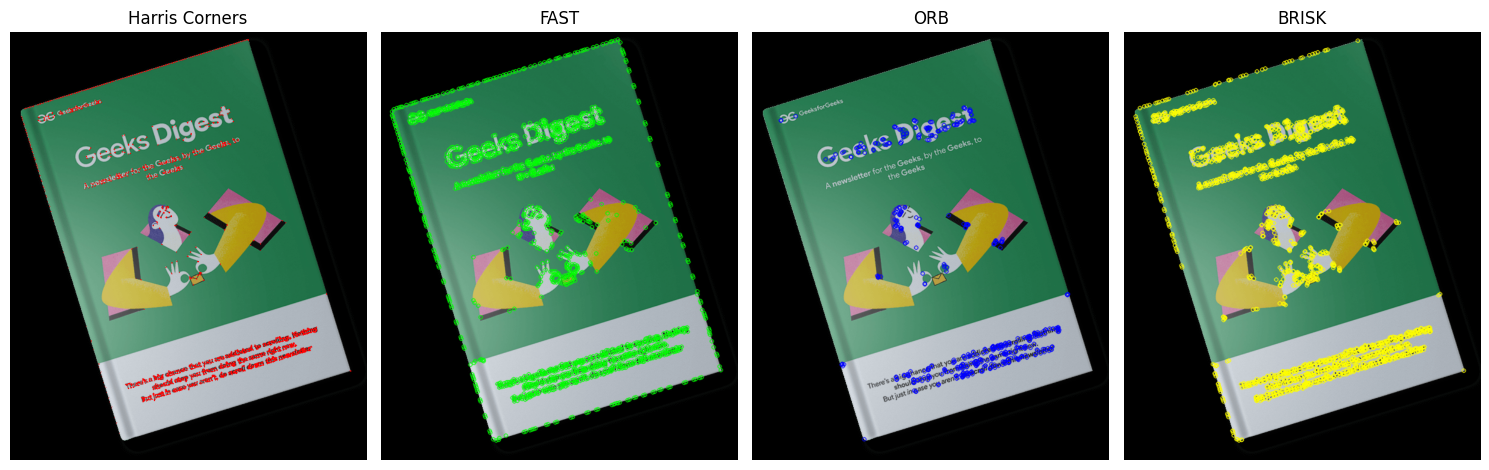

In [ ]:
# Harris Corner Detector
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
harris = cv2.cornerHarris(gray, 2, 3, 0.04)
img_harris = img1.copy()
img_harris[harris > 0.01 * harris.max()] = [0, 0, 255]

# FAST Detector
fast = cv2.FastFeatureDetector_create()
kp_fast = fast.detect(img1, None)
img_fast = cv2.drawKeypoints(img1, kp_fast, None, color=(0,255,0))

# ORB (detector + descriptor)
orb = cv2.ORB_create()
kp_orb, des_orb = orb.detectAndCompute(img1, None)
img_orb = cv2.drawKeypoints(img1, kp_orb, None, color=(255,0,0))

# BRISK
brisk = cv2.BRISK_create()
kp_brisk, des_brisk = brisk.detectAndCompute(img1, None)
img_brisk = cv2.drawKeypoints(img1, kp_brisk, None, color=(0,255,255))

# try:
#     surf = cv2.xfeatures2d.SURF_create(400)
#     kp_surf, des_surf = surf.detectAndCompute(img1, None)
#     img_surf = cv2.drawKeypoints(img1, kp_surf, None, color=(255,255,0))
# except:
#     img_surf = np.zeros_like(img1) + 100  # placeholder if SURF not installed

# Show overview
titles = ["Harris Corners", "FAST", "ORB", "BRISK"]
images = [img_harris, img_fast, img_orb, img_brisk]

plt.figure(figsize=(15,8))
for i, (im, t) in enumerate(zip(images, titles)):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(t)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [71]:
img1 = img2

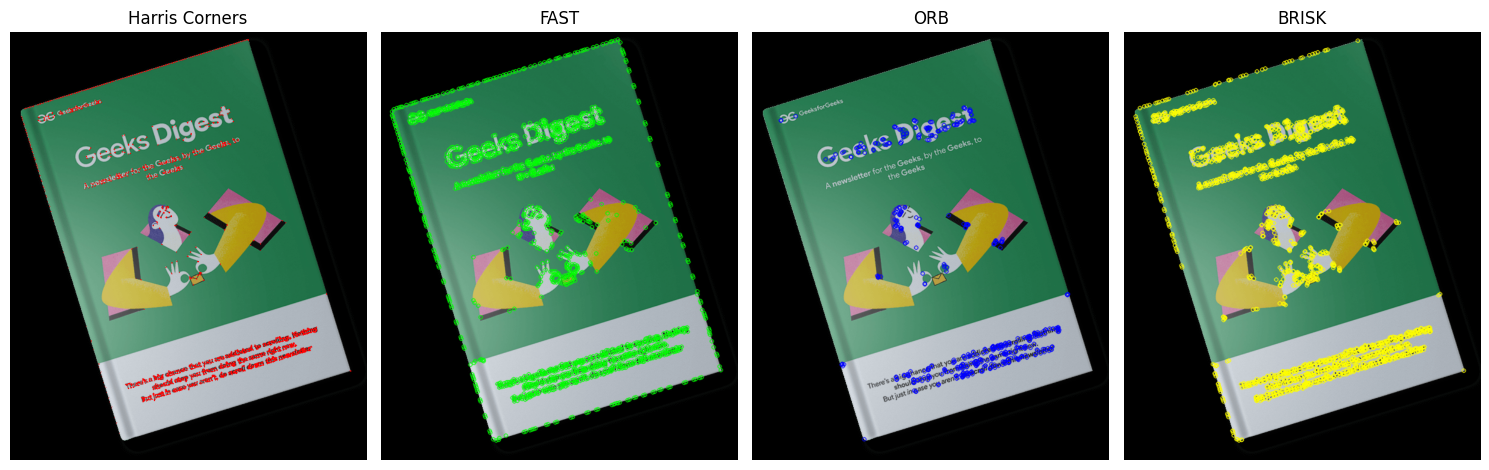

In [74]:
# Harris Corner Detector
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
harris = cv2.cornerHarris(gray, 2, 3, 0.04)
img_harris = img1.copy()
img_harris[harris > 0.01 * harris.max()] = [0, 0, 255]

# FAST Detector
fast = cv2.FastFeatureDetector_create()
kp_fast = fast.detect(img1, None)
img_fast = cv2.drawKeypoints(img1, kp_fast, None, color=(0,255,0))

# ORB (detector + descriptor)
orb = cv2.ORB_create()
kp_orb, des_orb = orb.detectAndCompute(img1, None)
img_orb = cv2.drawKeypoints(img1, kp_orb, None, color=(255,0,0))

# BRISK
brisk = cv2.BRISK_create()
kp_brisk, des_brisk = brisk.detectAndCompute(img1, None)
img_brisk = cv2.drawKeypoints(img1, kp_brisk, None, color=(0,255,255))

# try:
#     surf = cv2.xfeatures2d.SURF_create(400)
#     kp_surf, des_surf = surf.detectAndCompute(img1, None)
#     img_surf = cv2.drawKeypoints(img1, kp_surf, None, color=(255,255,0))
# except:
#     img_surf = np.zeros_like(img1) + 100  # placeholder if SURF not installed

# Show overview
titles = ["Harris Corners", "FAST", "ORB", "BRISK"]
images = [img_harris, img_fast, img_orb, img_brisk]

plt.figure(figsize=(15,15))
for i, (im, t) in enumerate(zip(images, titles)):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(t)
    plt.axis("off")
plt.tight_layout()
plt.show()
